# Gaussian Bayes Classification on Iris Dataset
The following notebook tests the bayes classifier and naive bayes classifier on the iris dataset, commonly used for classification problems.

<img src="https://cdn.shopify.com/s/files/1/0065/4999/5573/files/bahen_organic_milk_3_1024x1024.jpg?v=1666934011" alt="Bahen organic milk chocolate" width="500">


In [95]:
# Import libraries
from sklearn.datasets import load_iris
import random
import pandas as pd
import math
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt

In [9]:
# Import data and create classification target
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

In [36]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Checking Gaussian Distribution of each of the features

/Users/allielynn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


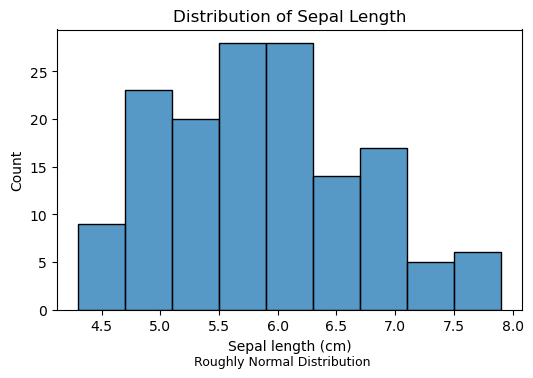

In [110]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(df.iloc[:, 0], ax=ax)
ax.set_title("Distribution of Sepal Length")
ax.set_xlabel("Sepal length (cm)")
ax.set_ylabel("Count")
fig.subplots_adjust(bottom=0.18)
fig.text(0.5, 0.05, "Roughly Normal Distribution",
         ha="center", va="center", fontsize=9)
plt.show()

/Users/allielynn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


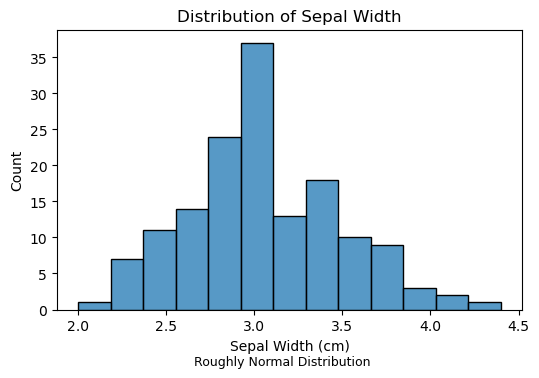

In [113]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(df.iloc[:, 1], ax=ax)
ax.set_title("Distribution of Sepal Width")
ax.set_xlabel("Sepal Width (cm)")
ax.set_ylabel("Count")
fig.subplots_adjust(bottom=0.18)
fig.text(0.5, 0.05, "Roughly Normal Distribution",
         ha="center", va="center", fontsize=9)
plt.show()

/Users/allielynn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


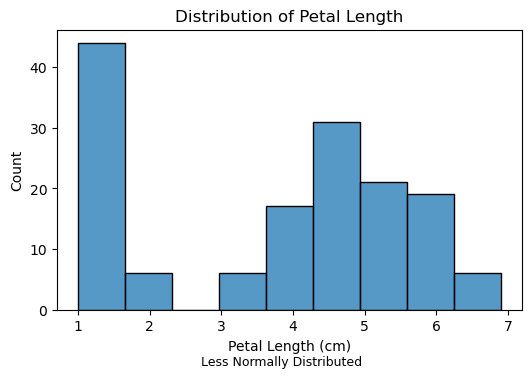

In [117]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(df.iloc[:, 2], ax=ax)
ax.set_title("Distribution of Petal Length")
ax.set_xlabel("Petal Length (cm)")
ax.set_ylabel("Count")
fig.subplots_adjust(bottom=0.18)
fig.text(0.5, 0.05, "Less Normally Distributed",
         ha="center", va="center", fontsize=9)
plt.show()

/Users/allielynn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


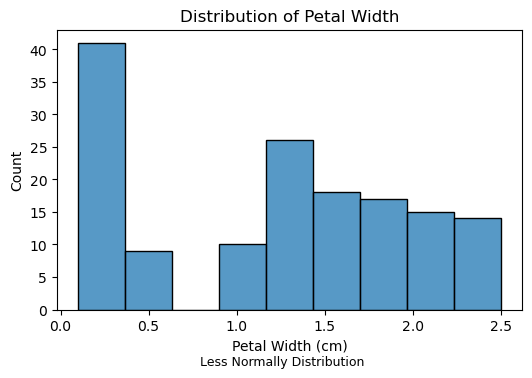

In [119]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(df.iloc[:, 3], ax=ax)
ax.set_title("Distribution of Petal Width")
ax.set_xlabel("Petal Width (cm)")
ax.set_ylabel("Count")
fig.subplots_adjust(bottom=0.18)
fig.text(0.5, 0.05, "Less Normally Distribution",
         ha="center", va="center", fontsize=9)
plt.show()

Despite stronger outliers in petal width and petal length, we will go forward with Gaussian Naive Bayes as it fits the first 2 features quite well and fits the petal width and length apart from the outlier. Future implementations of this could potentially remove the outliers in the petal features to fit the Gaussian assumption better and potentially increase accuracy.

# Naive Bayes Classifier
$P(y | X) = \frac{P(X | y) \cdot P(y)}{P(X)}$ assuming $P(x_1, x_2, ..., x_N |y) = \prod P(x_i |y )$

In [67]:
# manual function
def naive_bayes_iris(testx, trainx, trainy):
    
    # get indices
    indices_setosa = np.where(trainy == "setosa")[0]
    trainx_setosa = trainx.iloc[indices_setosa]
    indices_versicolor = np.where(trainy == "versicolor")[0]
    trainx_versicolor = trainx.iloc[indices_versicolor]
    indices_virginica = np.where(trainy == "virginica")[0]
    trainx_virginica = trainx.iloc[indices_virginica]
    
    # Distribution of Classes
    
    # Setosa
    # mean
    x1bar_setosa = np.mean(trainx_setosa.iloc[:, 0])
    x2bar_setosa = np.mean(trainx_setosa.iloc[:, 1])
    x3bar_setosa = np.mean(trainx_setosa.iloc[:, 2])
    x4bar_setosa = np.mean(trainx_setosa.iloc[:, 3])
    # sd
    sd1_setosa = np.std(trainx_setosa.iloc[:, 0])
    sd2_setosa = np.std(trainx_setosa.iloc[:, 1])
    sd3_setosa = np.std(trainx_setosa.iloc[:, 2])
    sd4_setosa = np.std(trainx_setosa.iloc[:, 3])
    
    # Versicolor
    # mean
    x1bar_versicolor = np.mean(trainx_versicolor.iloc[:, 0])
    x2bar_versicolor = np.mean(trainx_versicolor.iloc[:, 1])
    x3bar_versicolor = np.mean(trainx_versicolor.iloc[:, 2])
    x4bar_versicolor = np.mean(trainx_versicolor.iloc[:, 3])
    # sd
    sd1_versicolor = np.std(trainx_versicolor.iloc[:, 0])
    sd2_versicolor = np.std(trainx_versicolor.iloc[:, 1])
    sd3_versicolor = np.std(trainx_versicolor.iloc[:, 2])
    sd4_versicolor = np.std(trainx_versicolor.iloc[:, 3])
    
    # Virginica
    # mean
    x1bar_virginica = np.mean(trainx_virginica.iloc[:, 0])
    x2bar_virginica = np.mean(trainx_virginica.iloc[:, 1])
    x3bar_virginica = np.mean(trainx_virginica.iloc[:, 2])
    x4bar_virginica = np.mean(trainx_virginica.iloc[:, 3])
    # sd
    sd1_virginica = np.std(trainx_virginica.iloc[:, 0])
    sd2_virginica = np.std(trainx_virginica.iloc[:, 1])
    sd3_virginica = np.std(trainx_virginica.iloc[:, 2])
    sd4_virginica = np.std(trainx_virginica.iloc[:, 3])
    
    
    # Likelihoods
    # class setosa
    like_setosa = norm.pdf(testx.iloc[:, 0], loc = x1bar_setosa, scale = sd1_setosa) * norm.pdf(testx.iloc[:, 1], loc = x2bar_setosa, scale = sd2_setosa) * norm.pdf(testx.iloc[:, 2], loc = x3bar_setosa, scale = sd3_setosa) * norm.pdf(testx.iloc[:, 3], loc = x4bar_setosa, scale = sd4_setosa) 
    # class versicolor
    like_versicolor = norm.pdf(testx.iloc[:, 0], loc = x1bar_versicolor, scale = sd1_versicolor) * norm.pdf(testx.iloc[:, 1], loc = x2bar_versicolor, scale = sd2_versicolor) * norm.pdf(testx.iloc[:, 2], loc = x3bar_versicolor, scale = sd3_versicolor) * norm.pdf(testx.iloc[:, 3], loc = x4bar_versicolor, scale = sd4_versicolor) 
    # class virginica
    like_virginica = norm.pdf(testx.iloc[:, 0], loc = x1bar_virginica, scale = sd1_virginica) * norm.pdf(testx.iloc[:, 1], loc = x2bar_virginica, scale = sd2_virginica) * norm.pdf(testx.iloc[:, 2], loc = x3bar_virginica, scale = sd3_virginica) * norm.pdf(testx.iloc[:, 3], loc = x4bar_virginica, scale = sd4_virginica) 
    
    
    # Priors
    trainy_setosa = len(np.where(trainy == "setosa")[0])
    trainy_versicolor = len(np.where(trainy == "versicolor")[0])
    trainy_virginica = len(np.where(trainy == "virginica")[0])
    
    total = trainy_setosa + trainy_versicolor + trainy_virginica
    
    prior_setosa = trainy_setosa / total
    prior_versicolor = trainy_versicolor / total
    prior_virginica = trainy_virginica / total
    
    # Marginal
    marginal = like_setosa * prior_setosa + like_virginica * prior_virginica + like_versicolor * prior_versicolor
    
    # Probabilities
    prob_setosa = like_setosa * prior_setosa / marginal
    prob_versicolor = like_versicolor * prior_versicolor / marginal
    prob_virginica = like_virginica * prior_virginica / marginal
    probs_df = pd.DataFrame({
    "setosa": prob_setosa,
    "versicolor": prob_versicolor,
    "virginica": prob_virginica
    })
    
    return(probs_df)
    

In [75]:
# Testing
random.seed(1)
# create training rows: sample 40 from each class without replacement
train_idx = np.sort(
    np.concatenate([
        np.random.choice(range(0, 50), 40, replace=False),      # setosa
        np.random.choice(range(50, 100), 40, replace=False),    # versicolor
        np.random.choice(range(100, 150), 40, replace=False)    # virginica
    ])
)

# training data
training_x = df.iloc[train_idx, 0:4]
training_y = df.iloc[train_idx, 4]

# test cases
test_setosa = df.iloc[[4], 0:4]  # true class: setosa
test_versicolor = df.iloc[[80], 0:4] # true class: versicolor
test_virginica = df.iloc[[115], 0:4]# true class: virginica

,setosa,versicolor,virginica
0,1.0,2.244108e-20,1.998062e-29


### Setosa Class Test

In [76]:
naive_bayes_iris(test_setosa, training_x, training_y)

,setosa,versicolor,virginica
0,1.0,2.244108e-20,1.998062e-29


In [77]:
# Checking with built-in function
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(training_x, training_y)
pd.DataFrame(gnb.predict_proba(test_setosa), columns = ['setosa', 'versicolor', 'virgnica'])

,setosa,versicolor,virgnica
0,1.0,2.244113e-20,1.998065e-29


### Versicolor Class Test

In [80]:
naive_bayes_iris(test_versicolor, training_x, training_y)

,setosa,versicolor,virginica
0,1.121600e-60,0.999998,0.000002


In [81]:
pd.DataFrame(gnb.predict_proba(test_versicolor), columns = ['setosa', 'versicolor', 'virgnica'])

,setosa,versicolor,virgnica
0,1.121623e-60,0.999998,0.000002


### Virginica Class Test

In [82]:
naive_bayes_iris(test_virginica, training_x, training_y)

,setosa,versicolor,virginica
0,1.666623e-207,6.025905e-08,1.0


In [83]:
pd.DataFrame(gnb.predict_proba(test_virginica), columns = ['setosa', 'versicolor', 'virgnica'])

,setosa,versicolor,virgnica
0,1.666760e-207,6.025913e-08,1.0


## Accuracy Metric on Full Dataset

In [120]:
test = df.drop(index = train_idx)
test_x = test.iloc[:, 0:4]
test_y = test.iloc[:,4]
probs_df = naive_bayes_iris(test_x, training_x, training_y)
y_pred = probs_df.idxmax(axis =1)
accuracy = (y_pred.values == test_y.values).mean()
print(f"Accuracy on  test set: {accuracy:.4f} ({accuracy*100:.2f}%)")

# confusion matrix
conf = pd.crosstab(pd.Series(test_y.values, name="true"),
                   pd.Series(y_pred.values, name="pred"))
print(conf)

Accuracy on  test set: 0.9333 (93.33%)
pred        setosa  versicolor  virginica
true                                     
setosa          10           0          0
versicolor       0           9          1
virginica        0           1          9
